<a href="https://colab.research.google.com/github/Marciorochar/Analise-Preditiva/blob/main/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

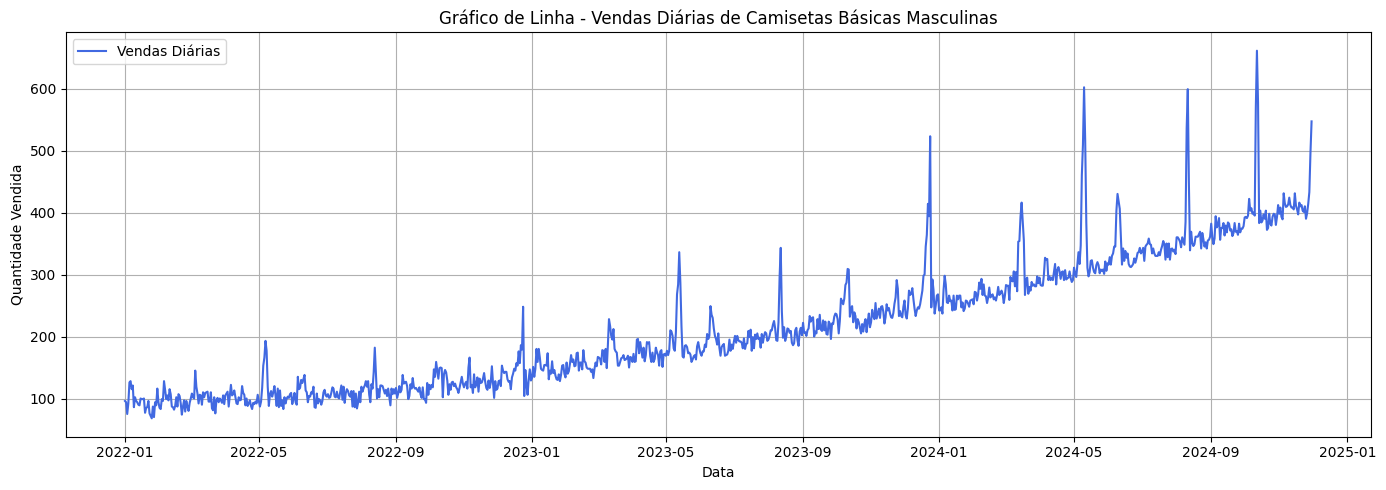

In [5]:
# 📦 Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# 📊 Leitura do arquivo já presente no Colab
df = pd.read_excel('/content/Dados_29-04-25.xlsx')  # Caminho padrão no Colab

# 📌 Renomear colunas (ajuste se necessário)
df.columns = ['Data', 'Dia_da_Semana', 'Vendas']

# 🕒 Converter coluna de datas
df['Data'] = pd.to_datetime(df['Data'], dayfirst=True)

# 📈 Plotar gráfico de linha
plt.figure(figsize=(14, 5))
plt.plot(df['Data'], df['Vendas'], color='royalblue', label='Vendas Diárias')
plt.title('Gráfico de Linha - Vendas Diárias de Camisetas Básicas Masculinas')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


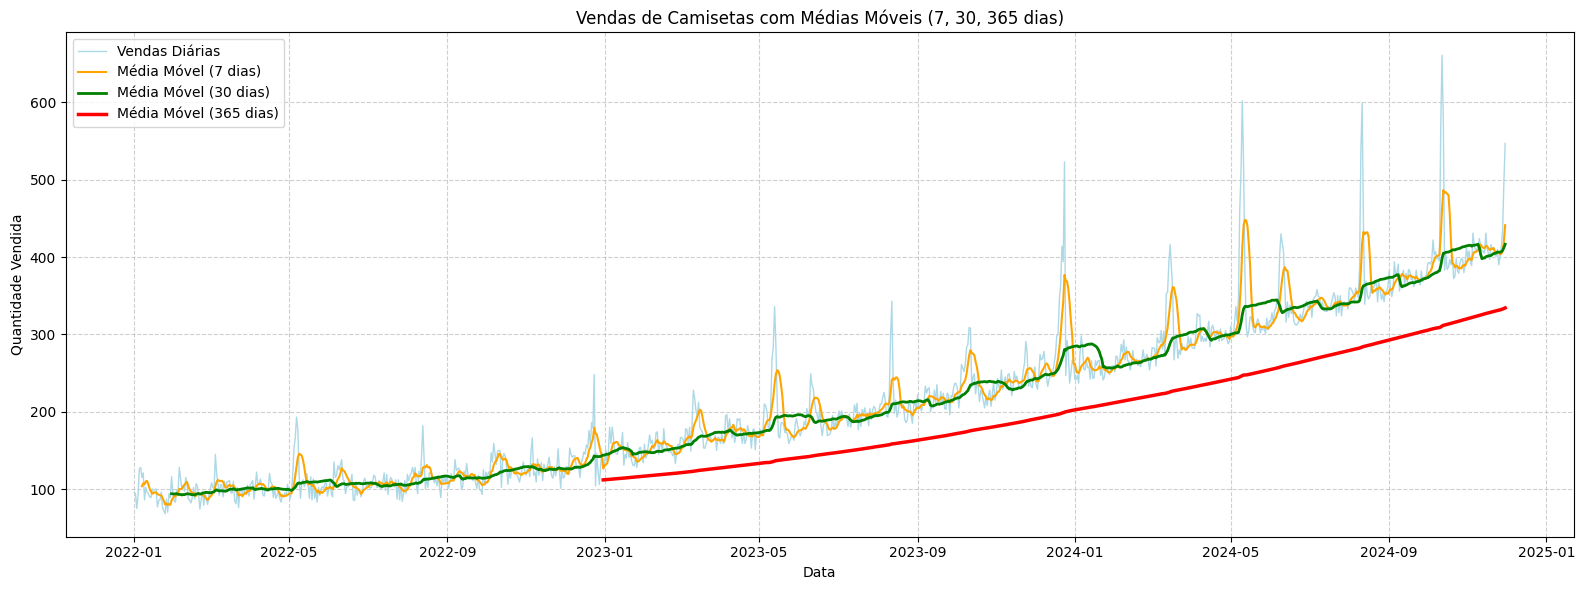

In [10]:
# 📦 Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# 📊 Carregar a planilha local (ajuste o caminho se necessário)
df = pd.read_excel('/content/Dados_29-04-25.xlsx')

# 🧹 Organizar colunas
df.columns = ['Data', 'Dia_da_Semana', 'Vendas']
df['Data'] = pd.to_datetime(df['Data'], dayfirst=True)
df = df[['Data', 'Vendas']].dropna().sort_values('Data')

# 📈 Calcular médias móveis
df['MM_7'] = df['Vendas'].rolling(window=7).mean()
df['MM_30'] = df['Vendas'].rolling(window=30).mean()
df['MM_365'] = df['Vendas'].rolling(window=365).mean()

# 🎨 Plotar gráfico
plt.figure(figsize=(16, 6))
plt.plot(df['Data'], df['Vendas'], color='lightblue', linewidth=1, label='Vendas Diárias')
plt.plot(df['Data'], df['MM_7'], color='orange', linewidth=1.5, label='Média Móvel (7 dias)')
plt.plot(df['Data'], df['MM_30'], color='green', linewidth=2, label='Média Móvel (30 dias)')
plt.plot(df['Data'], df['MM_365'], color='red', linewidth=2.5, label='Média Móvel (365 dias)')

# 🎯 Personalização do gráfico
plt.title('Vendas de Camisetas com Médias Móveis (7, 30, 365 dias)')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
